In [1]:
from glob import glob
import sys
import getpass
import os
# import psutil
from os.path import join, dirname
from os.path import getsize
import pickle
import numpy as np
import pandas as pd
import scipy.stats

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.stats.multitest
# from statsmodels.sandbox.stats.multicomp import multipletests

# import nilearn.masking
from nilearn import plotting as nplt
from nilearn import image as niimg
import nilearn.decoding

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GroupKFold
from sklearn.preprocessing import StandardScaler
# from sklearn.svm import LinearSVC

# import mydef as my Class correction for projects
import mydef

You need to connect T7SSD1 with your PC!
dir_root is replaced by /Users/clmn/Desktop/GA.


/usr/local/anaconda3/envs/sampark/lib/python3.7/site-packages/nilearn/datasets/__init__.py:90: FutureWarning: Fetchers from the nilearn.datasets module will be updated in version 0.9 to return python strings instead of bytes and Pandas dataframes instead of Numpy arrays.
  "Numpy arrays.", FutureWarning)


In [2]:
GA = mydef.GA()

# ROI list

## Movement-related ROIs from localizer

In [3]:
GA.initialize()

In [4]:
## ROI
path_list = sorted(glob(join(GA.dir_mask,'localizer','n200_*.nii')))
for path in path_list:
    roi = path.split('/')[-1].replace('_mask.nii', '')
    GA.roi_imgs[roi] = niimg.load_img(path)
GA.roi_imgs

{'n200_c1-1_L_M1': <nibabel.nifti1.Nifti1Image at 0x7fa1e06ff8d0>,
 'n200_c1-2_L_S1': <nibabel.nifti1.Nifti1Image at 0x7fa1f0818cd0>,
 'n200_c1_L_Postcentral': <nibabel.nifti1.Nifti1Image at 0x7fa1d2f643d0>,
 'n200_c1_R_SPL': <nibabel.nifti1.Nifti1Image at 0x7fa1d2f64550>,
 'n200_c2_R_CerebellumIV-V': <nibabel.nifti1.Nifti1Image at 0x7fa1d2f64710>,
 'n200_c2_R_MFG': <nibabel.nifti1.Nifti1Image at 0x7fa1d2f64950>,
 'n200_c3_R_MTG': <nibabel.nifti1.Nifti1Image at 0x7fa1d2f64b90>,
 'n200_c3_R_Postcentral': <nibabel.nifti1.Nifti1Image at 0x7fa1d2f64d50>,
 'n200_c4_L_IFG': <nibabel.nifti1.Nifti1Image at 0x7fa1d2f64dd0>,
 'n200_c4_L_Putamen': <nibabel.nifti1.Nifti1Image at 0x7fa1e1095090>,
 'n200_c5_L_SPL': <nibabel.nifti1.Nifti1Image at 0x7fa1e10953d0>,
 'n200_c5_R_SMA': <nibabel.nifti1.Nifti1Image at 0x7fa1e10955d0>,
 'n200_c6_R_CerebellumVIIIb': <nibabel.nifti1.Nifti1Image at 0x7fa1e10954d0>,
 'n200_c6_R_MFG': <nibabel.nifti1.Nifti1Image at 0x7fa1e10959d0>,
 'n200_c7_L_Thalamus': <nibabel

In [5]:
key_list = ['n200_c1_L_Postcentral'
            , 'n200_c2_R_CerebellumIV-V'
            , 'n200_c3_R_Postcentral'
            , 'n200_c4_L_Putamen'
            , 'n200_c5_R_SMA'
            , 'n200_c6_R_CerebellumVIIIb'
            , 'n200_c7_L_Thalamus']
temp = {}
for key in key_list:
    temp[key] = GA.roi_imgs[key]
GA.roi_imgs = temp
GA.roi_imgs

{'n200_c1_L_Postcentral': <nibabel.nifti1.Nifti1Image at 0x7fa1d2f643d0>,
 'n200_c2_R_CerebellumIV-V': <nibabel.nifti1.Nifti1Image at 0x7fa1d2f64710>,
 'n200_c3_R_Postcentral': <nibabel.nifti1.Nifti1Image at 0x7fa1d2f64d50>,
 'n200_c4_L_Putamen': <nibabel.nifti1.Nifti1Image at 0x7fa1e1095090>,
 'n200_c5_R_SMA': <nibabel.nifti1.Nifti1Image at 0x7fa1e10955d0>,
 'n200_c6_R_CerebellumVIIIb': <nibabel.nifti1.Nifti1Image at 0x7fa1e10954d0>,
 'n200_c7_L_Thalamus': <nibabel.nifti1.Nifti1Image at 0x7fa1e1095b90>}

### The Classification Accuracies of the above ROIs

### *Calculation
*run once

In [6]:
# for subj in GA.list_subj:
for subj in ['01', '02']:
    for stage in GA.list_stage:
        GA.cross_valid(GA.load_beta(subj, stage), GA.lda)

In [8]:
## save the result
GA.save_pkl(data=GA.scores, suffix='7localizers')

### Wit dataframe

In [9]:
## compare by type
GA.show_pkl_list(GA.dir_script, word='7localizers')

,name,identity
0,20210426_7localizers.pkl,a
1,20210517_7localizers.pkl,b
2,20210511_7localizers.pkl,c


In [12]:
## load scores
GA.scores = GA.load_pkl(fname='20210517_7localizers.pkl')

In [14]:
GA.make_wit_score()

,subj,ROI,visit,mapping,accuracy_1,accuracy_2,accuracy_3,mean_accuracy
0,01,n200_c1_L_Postcentral,early,practice,0.322917,0.427083,0.385417,0.378472
1,01,n200_c2_R_CerebellumIV-V,early,practice,0.239583,0.218750,0.322917,0.260417
2,01,n200_c3_R_Postcentral,early,practice,0.312500,0.291667,0.333333,0.312500
3,01,n200_c4_L_Putamen,early,practice,0.250000,0.322917,0.208333,0.260417
4,01,n200_c5_R_SMA,early,practice,0.333333,0.322917,0.354167,0.336806
5,01,n200_c6_R_CerebellumVIIIb,early,practice,0.322917,0.333333,0.260417,0.305556
6,01,n200_c7_L_Thalamus,early,practice,0.218750,0.312500,0.270833,0.267361
7,01,n200_c1_L_Postcentral,early,unpractice,0.364583,0.385417,0.489583,0.413194
8,01,n200_c2_R_CerebellumIV-V,early,unpractice,0.354167,0.270833,0.322917,0.315972
9,01,n200_c3_R_Postcentral,early,unpractice,0.354167,0.343750,0.302083,0.333333


n200_c1_L_Postcentral(n_voxles=200)
n200_c2_R_CerebellumIV-V(n_voxles=200)
n200_c3_R_Postcentral(n_voxles=200)
n200_c4_L_Putamen(n_voxles=200)
n200_c5_R_SMA(n_voxles=200)
n200_c6_R_CerebellumVIIIb(n_voxles=200)
n200_c7_L_Thalamus(n_voxles=200)


0

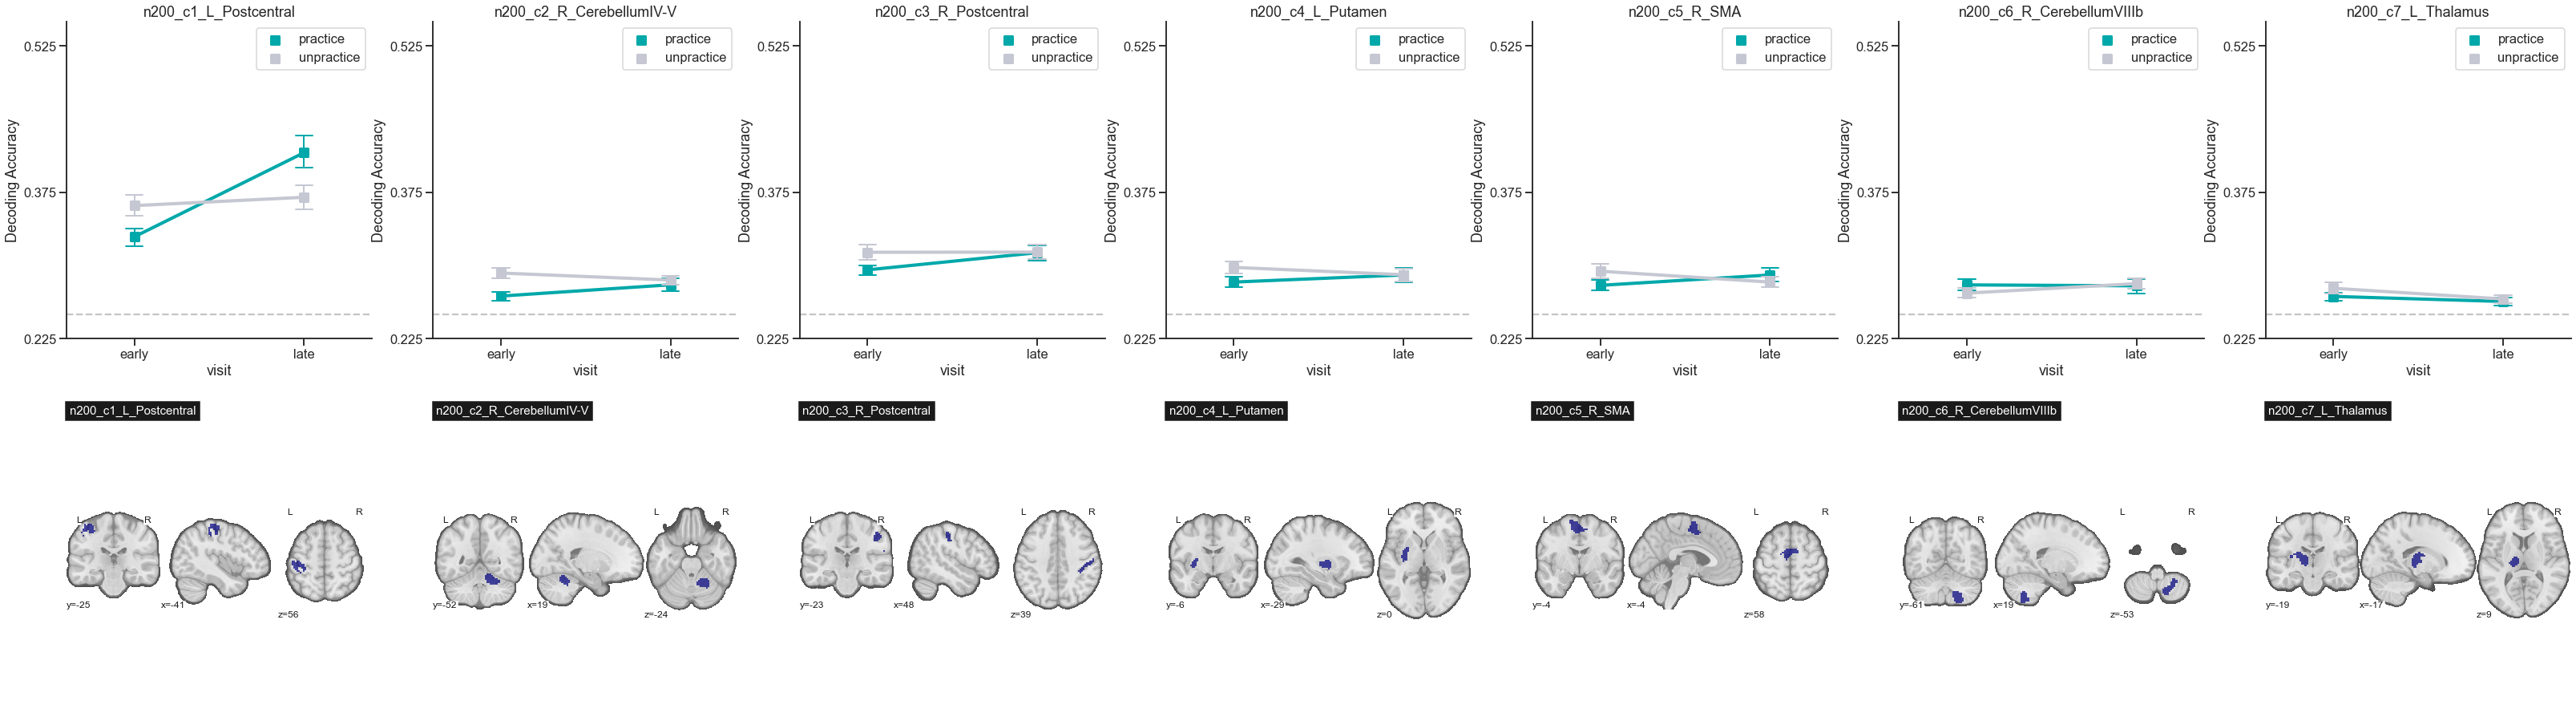

In [14]:
GA.draw_lineplots_with_rois(img_bg=GA.img_bg, n_columns=7)

In [16]:
GA.do_paired_ttest('early_practice','late_practice')

,ROI,cond_A,cond_B,t-statistic,Two-sided p-value,rejected,pvalue-corrected
0,n200_c1_L_Postcentral,early_practice,late_practice,-4.574044,0.000083,True,0.000083
1,n200_c2_R_CerebellumIV-V,early_practice,late_practice,-1.865849,0.072207,False,0.072207
2,n200_c3_R_Postcentral,early_practice,late_practice,-1.926143,0.063940,False,0.063940
3,n200_c4_L_Putamen,early_practice,late_practice,-0.863909,0.394728,False,0.394728
4,n200_c5_R_SMA,early_practice,late_practice,-1.338056,0.191276,False,0.191276
5,n200_c6_R_CerebellumVIIIb,early_practice,late_practice,0.097040,0.923362,False,0.923362
6,n200_c7_L_Thalamus,early_practice,late_practice,0.832935,0.411689,False,0.411689


In [17]:
GA.do_paired_ttest('early_practice','early_unpractice')

,ROI,cond_A,cond_B,t-statistic,Two-sided p-value,rejected,pvalue-corrected
0,n200_c1_L_Postcentral,early_practice,early_unpractice,-2.810440,0.008773,False,0.008773
1,n200_c2_R_CerebellumIV-V,early_practice,early_unpractice,-3.244826,0.002959,True,0.002959
2,n200_c3_R_Postcentral,early_practice,early_unpractice,-1.859598,0.073115,False,0.073115
3,n200_c4_L_Putamen,early_practice,early_unpractice,-1.900152,0.067397,False,0.067397
4,n200_c5_R_SMA,early_practice,early_unpractice,-1.781301,0.085341,False,0.085341
5,n200_c6_R_CerebellumVIIIb,early_practice,early_unpractice,1.298888,0.204216,False,0.204216
6,n200_c7_L_Thalamus,early_practice,early_unpractice,-1.218488,0.232859,False,0.232859


In [18]:
GA.do_paired_ttest('late_practice','late_unpractice')

,ROI,cond_A,cond_B,t-statistic,Two-sided p-value,rejected,pvalue-corrected
0,n200_c1_L_Postcentral,late_practice,late_unpractice,3.154366,0.003728,True,0.003728
1,n200_c2_R_CerebellumIV-V,late_practice,late_unpractice,-0.597574,0.554762,False,0.554762
2,n200_c3_R_Postcentral,late_practice,late_unpractice,-0.074177,0.941379,False,0.941379
3,n200_c4_L_Putamen,late_practice,late_unpractice,-0.033267,0.973689,False,0.973689
4,n200_c5_R_SMA,late_practice,late_unpractice,1.001306,0.324961,False,0.324961
5,n200_c6_R_CerebellumVIIIb,late_practice,late_unpractice,-0.232368,0.817884,False,0.817884
6,n200_c7_L_Thalamus,late_practice,late_unpractice,-0.402506,0.690263,False,0.690263


In [19]:
GA.make_wit_mean_ttest(stage='early_practice', mean=0.25)

,ROI,visit,mapping,tval,pval_uncorrected,reject,pval_corrected
0,n200_c1_L_Postcentral,early,practice,8.703611,1.394858e-09,True,1.394858e-09
1,n200_c2_R_CerebellumIV-V,early,practice,3.806147,6.754291e-04,True,6.754291e-04
2,n200_c3_R_Postcentral,early,practice,9.022293,6.455393e-10,True,6.455393e-10
3,n200_c4_L_Putamen,early,practice,6.371906,5.772277e-07,True,5.772277e-07
4,n200_c5_R_SMA,early,practice,5.639728,4.297449e-06,True,4.297449e-06
5,n200_c6_R_CerebellumVIIIb,early,practice,5.129903,1.767790e-05,True,1.767790e-05
6,n200_c7_L_Thalamus,early,practice,4.464133,1.121099e-04,True,1.121099e-04


## My replicated ROIs from localizers

In [18]:
## ROI
GA.roi_imgs = {}
path_list = sorted(glob(join(GA.dir_mask,'localizer_sampark','n*.nii.gz')))
for path in path_list:
    roi = path.split('/')[-1].replace('_mask.nii', '')
    GA.roi_imgs[roi] = niimg.load_img(path)
GA.roi_imgs

{'n200.L_Thalamus.nii.gz': <nibabel.nifti1.Nifti1Image at 0x7f84646e7c10>,
 'n200.R_CerebellumVIIIb.nii.gz': <nibabel.nifti1.Nifti1Image at 0x7f84646e7f40>,
 'n200.R_Postcentral.nii.gz': <nibabel.nifti1.Nifti1Image at 0x7f84646e76a0>,
 'n201.L_Postcentral.nii.gz': <nibabel.nifti1.Nifti1Image at 0x7f84646e7250>,
 'n202.R_CerebellumIV-V.nii.gz': <nibabel.nifti1.Nifti1Image at 0x7f84646e7ac0>,
 'n202.S_SMA.nii.gz': <nibabel.nifti1.Nifti1Image at 0x7f8461e08df0>,
 'n225.L_Putamen.nii.gz': <nibabel.nifti1.Nifti1Image at 0x7f84538a24c0>}

n200.L_Thalamus.nii.gz(n_voxles=200)
n200.R_CerebellumVIIIb.nii.gz(n_voxles=200)
n200.R_Postcentral.nii.gz(n_voxles=200)
n201.L_Postcentral.nii.gz(n_voxles=201)
n202.R_CerebellumIV-V.nii.gz(n_voxles=202)
n202.S_SMA.nii.gz(n_voxles=202)
n225.L_Putamen.nii.gz(n_voxles=225)


0

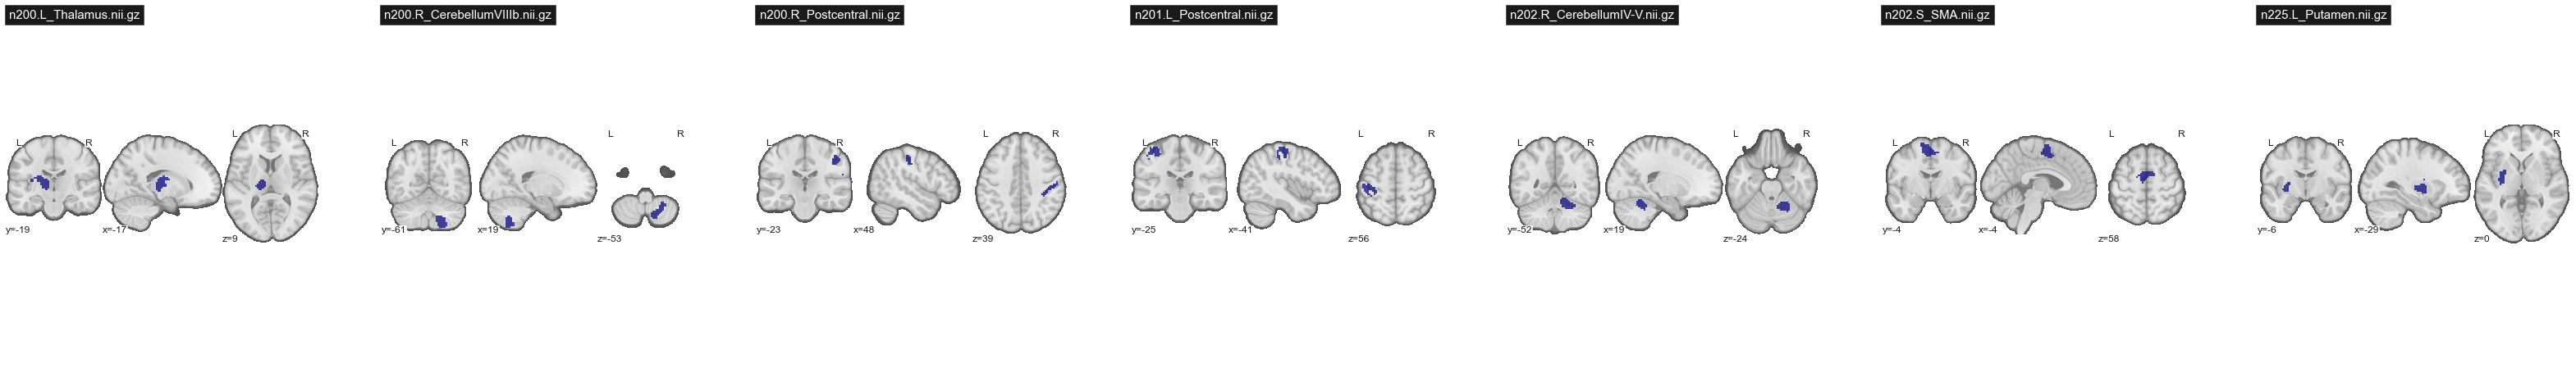

In [19]:
GA.draw_rois(img_bg=img_bg, n_columns=7)

## Default Mode Network

In [15]:
GA.initialize()

In [16]:
## DMN regions(global)
module_names = ['Core', 'dMsub', 'MTLsub']

for name in module_names:
    DMN_list = glob(join(GA.dir_dmn, name+'.nii'))
    for path in DMN_list:
        fname = path.split('/')[-1].replace('.nii', '')
        GA.roi_imgs[fname] = nilearn.image.load_img(path)
        
# ## DMN regions(detail)
module_names = ['Core', 'dMsub', 'MTLsub']

for name in module_names:
    DMN_list = glob(join(GA.dir_dmn, name+'_*.nii'))
    for path in DMN_list:
        fname = path.split('/')[-1].replace('.nii', '')
        GA.roi_imgs[fname] = nilearn.image.load_img(path)

GA.roi_imgs

{'Core': <nibabel.nifti1.Nifti1Image at 0x7fa1f139c310>,
 'dMsub': <nibabel.nifti1.Nifti1Image at 0x7fa1f139ca90>,
 'MTLsub': <nibabel.nifti1.Nifti1Image at 0x7fa1e1685890>,
 'Core_PCC_r': <nibabel.nifti1.Nifti1Image at 0x7fa1f13a8b90>,
 'Core_aMPFC_l': <nibabel.nifti1.Nifti1Image at 0x7fa1f13a8f10>,
 'Core_PCC_l': <nibabel.nifti1.Nifti1Image at 0x7fa1f13a80d0>,
 'Core_aMPFC_r': <nibabel.nifti1.Nifti1Image at 0x7fa1f13a83d0>,
 'dMsub_TempP_r_temp': <nibabel.nifti1.Nifti1Image at 0x7fa1f13a8210>,
 'dMsub_dMPFC': <nibabel.nifti1.Nifti1Image at 0x7fa1f13a8910>,
 'dMsub_TempP_l_temp': <nibabel.nifti1.Nifti1Image at 0x7fa1f14d1cd0>,
 'dMsub_TPJ_l': <nibabel.nifti1.Nifti1Image at 0x7fa2018fee10>,
 'dMsub_LTC_l': <nibabel.nifti1.Nifti1Image at 0x7fa1d47b9f90>,
 'dMsub_TPJ_r': <nibabel.nifti1.Nifti1Image at 0x7fa2018da190>,
 'dMsub_LTC_r': <nibabel.nifti1.Nifti1Image at 0x7fa2018dadd0>,
 'MTLsub_HF_r': <nibabel.nifti1.Nifti1Image at 0x7fa201b84790>,
 'MTLsub_PHC_r': <nibabel.nifti1.Nifti1Image

### Check that the default ROIs are equal to the sum of their sub-ROIs.

In [22]:
# ## Core
# img_sum = nilearn.image.math_img(
#     formula="img1+img2+img3+img4 > 0",
#     img1=GA.roi_imgs['Core_PCC_l'], img2=GA.roi_imgs['Core_PCC_r'], img3=GA.roi_imgs['Core_aMPFC_l'], img4=GA.roi_imgs['Core_aMPFC_r']
# )
# img_res = nilearn.image.math_img(formula="img1-img2", img1=GA.roi_imgs['Core'], img2=img_sum)
# img_res.get_fdata().sum()

0.0

In [23]:
# ## MTL
# img_sum = nilearn.image.math_img(
#     formula="img1+img2+img3+img4+img5+img6+img7+img8+img9 > 0",
#     img1=GA.roi_imgs['MTLsub_HF_l'], img2=GA.roi_imgs['MTLsub_HF_r']
#     , img3=GA.roi_imgs['MTLsub_PHC_l'], img4=GA.roi_imgs['MTLsub_PHC_r']
#     , img5=GA.roi_imgs['MTLsub_Rsp_l'], img6=GA.roi_imgs['MTLsub_Rsp_r']
#     , img7=GA.roi_imgs['MTLsub_pIPL_l'], img8=GA.roi_imgs['MTLsub_pIPL_r']
#     , img9=GA.roi_imgs['MTLsub_vMPFC']
# )
# img_res = nilearn.image.math_img(formula="img1-img2", img1=GA.roi_imgs['MTLsub'], img2=img_sum)
# img_res.get_fdata().sum()

0.0

In [25]:
# ## DMPFC
# img_sum = nilearn.image.math_img(
#     formula="img1+img2+img3+img4+img5+img6+img7 > 0",
#     img1=GA.roi_imgs['dMsub_LTC_l'], img2=GA.roi_imgs['dMsub_LTC_r']
#     , img3=GA.roi_imgs['dMsub_TPJ_l'], img4=GA.roi_imgs['dMsub_TPJ_r']
#     , img5=GA.roi_imgs['dMsub_TempP_l_temp'], img6=GA.roi_imgs['dMsub_TempP_r_temp']
#     , img7=GA.roi_imgs['dMsub_dMPFC']
# )
# img_res = nilearn.image.math_img(formula="img1-img2", img1=GA.roi_imgs['dMsub'], img2=img_sum)
# img_res.get_fdata().sum()

0.0

### The Classification Accuracies of the above ROIs

### *Calculation
*run once

In [4]:
for subj in GA.list_subj:
    for stage in GA.list_stage:
        GA.cross_valid(GA.load_beta(subj, stage), GA.lda)

In [5]:
## save the result
GA.save_pkl(data=GA.scores, suffix='DMN')

### Wit dataframe

In [17]:
## compare the results by type
GA.show_pkl_list(GA.dir_script, 'DMN')

,name,identity
0,20210426_DMN.pkl,a
1,20210511_DMN.pkl,b
2,20210511_Yeo1-DMN.pkl,c


In [20]:
## load scores
GA.scores = GA.load_pkl(fname='20210511_DMN.pkl')

In [21]:
GA.make_wit_score()

,subj,ROI,visit,mapping,accuracy_1,accuracy_2,accuracy_3,mean_accuracy
0,01,Core,early,practice,0.447917,0.333333,0.270833,0.350694
1,01,dMsub,early,practice,0.354167,0.260417,0.385417,0.333333
2,01,MTLsub,early,practice,0.406250,0.333333,0.302083,0.347222
3,01,Core_PCC_r,early,practice,0.364583,0.458333,0.291667,0.371528
4,01,Core_aMPFC_l,early,practice,0.354167,0.281250,0.312500,0.315972
...,...,...,...,...,...,...,...,...
2755,44,MTLsub_vMPFC,late,unpractice,0.343750,0.291667,0.281250,0.305556
2756,44,MTLsub_pIPL_l,late,unpractice,0.270833,0.250000,0.354167,0.291667
2757,44,MTLsub_HF_l,late,unpractice,0.291667,0.291667,0.302083,0.295139
2758,44,MTLsub_PHC_l,late,unpractice,0.322917,0.291667,0.281250,0.298611


Core(n_voxles=760)
dMsub(n_voxles=1166)
MTLsub(n_voxles=1766)
Core_PCC_r(n_voxles=203)
Core_aMPFC_l(n_voxles=203)
Core_PCC_l(n_voxles=203)
Core_aMPFC_r(n_voxles=203)
dMsub_TempP_r_temp(n_voxles=90)
dMsub_dMPFC(n_voxles=203)
dMsub_TempP_l_temp(n_voxles=79)
dMsub_TPJ_l(n_voxles=203)
dMsub_LTC_l(n_voxles=196)
dMsub_TPJ_r(n_voxles=202)
dMsub_LTC_r(n_voxles=193)
MTLsub_HF_r(n_voxles=203)
MTLsub_PHC_r(n_voxles=203)
MTLsub_Rsp_r(n_voxles=203)
MTLsub_pIPL_r(n_voxles=170)
MTLsub_vMPFC(n_voxles=191)
MTLsub_pIPL_l(n_voxles=187)
MTLsub_HF_l(n_voxles=203)
MTLsub_PHC_l(n_voxles=203)
MTLsub_Rsp_l(n_voxles=203)


0

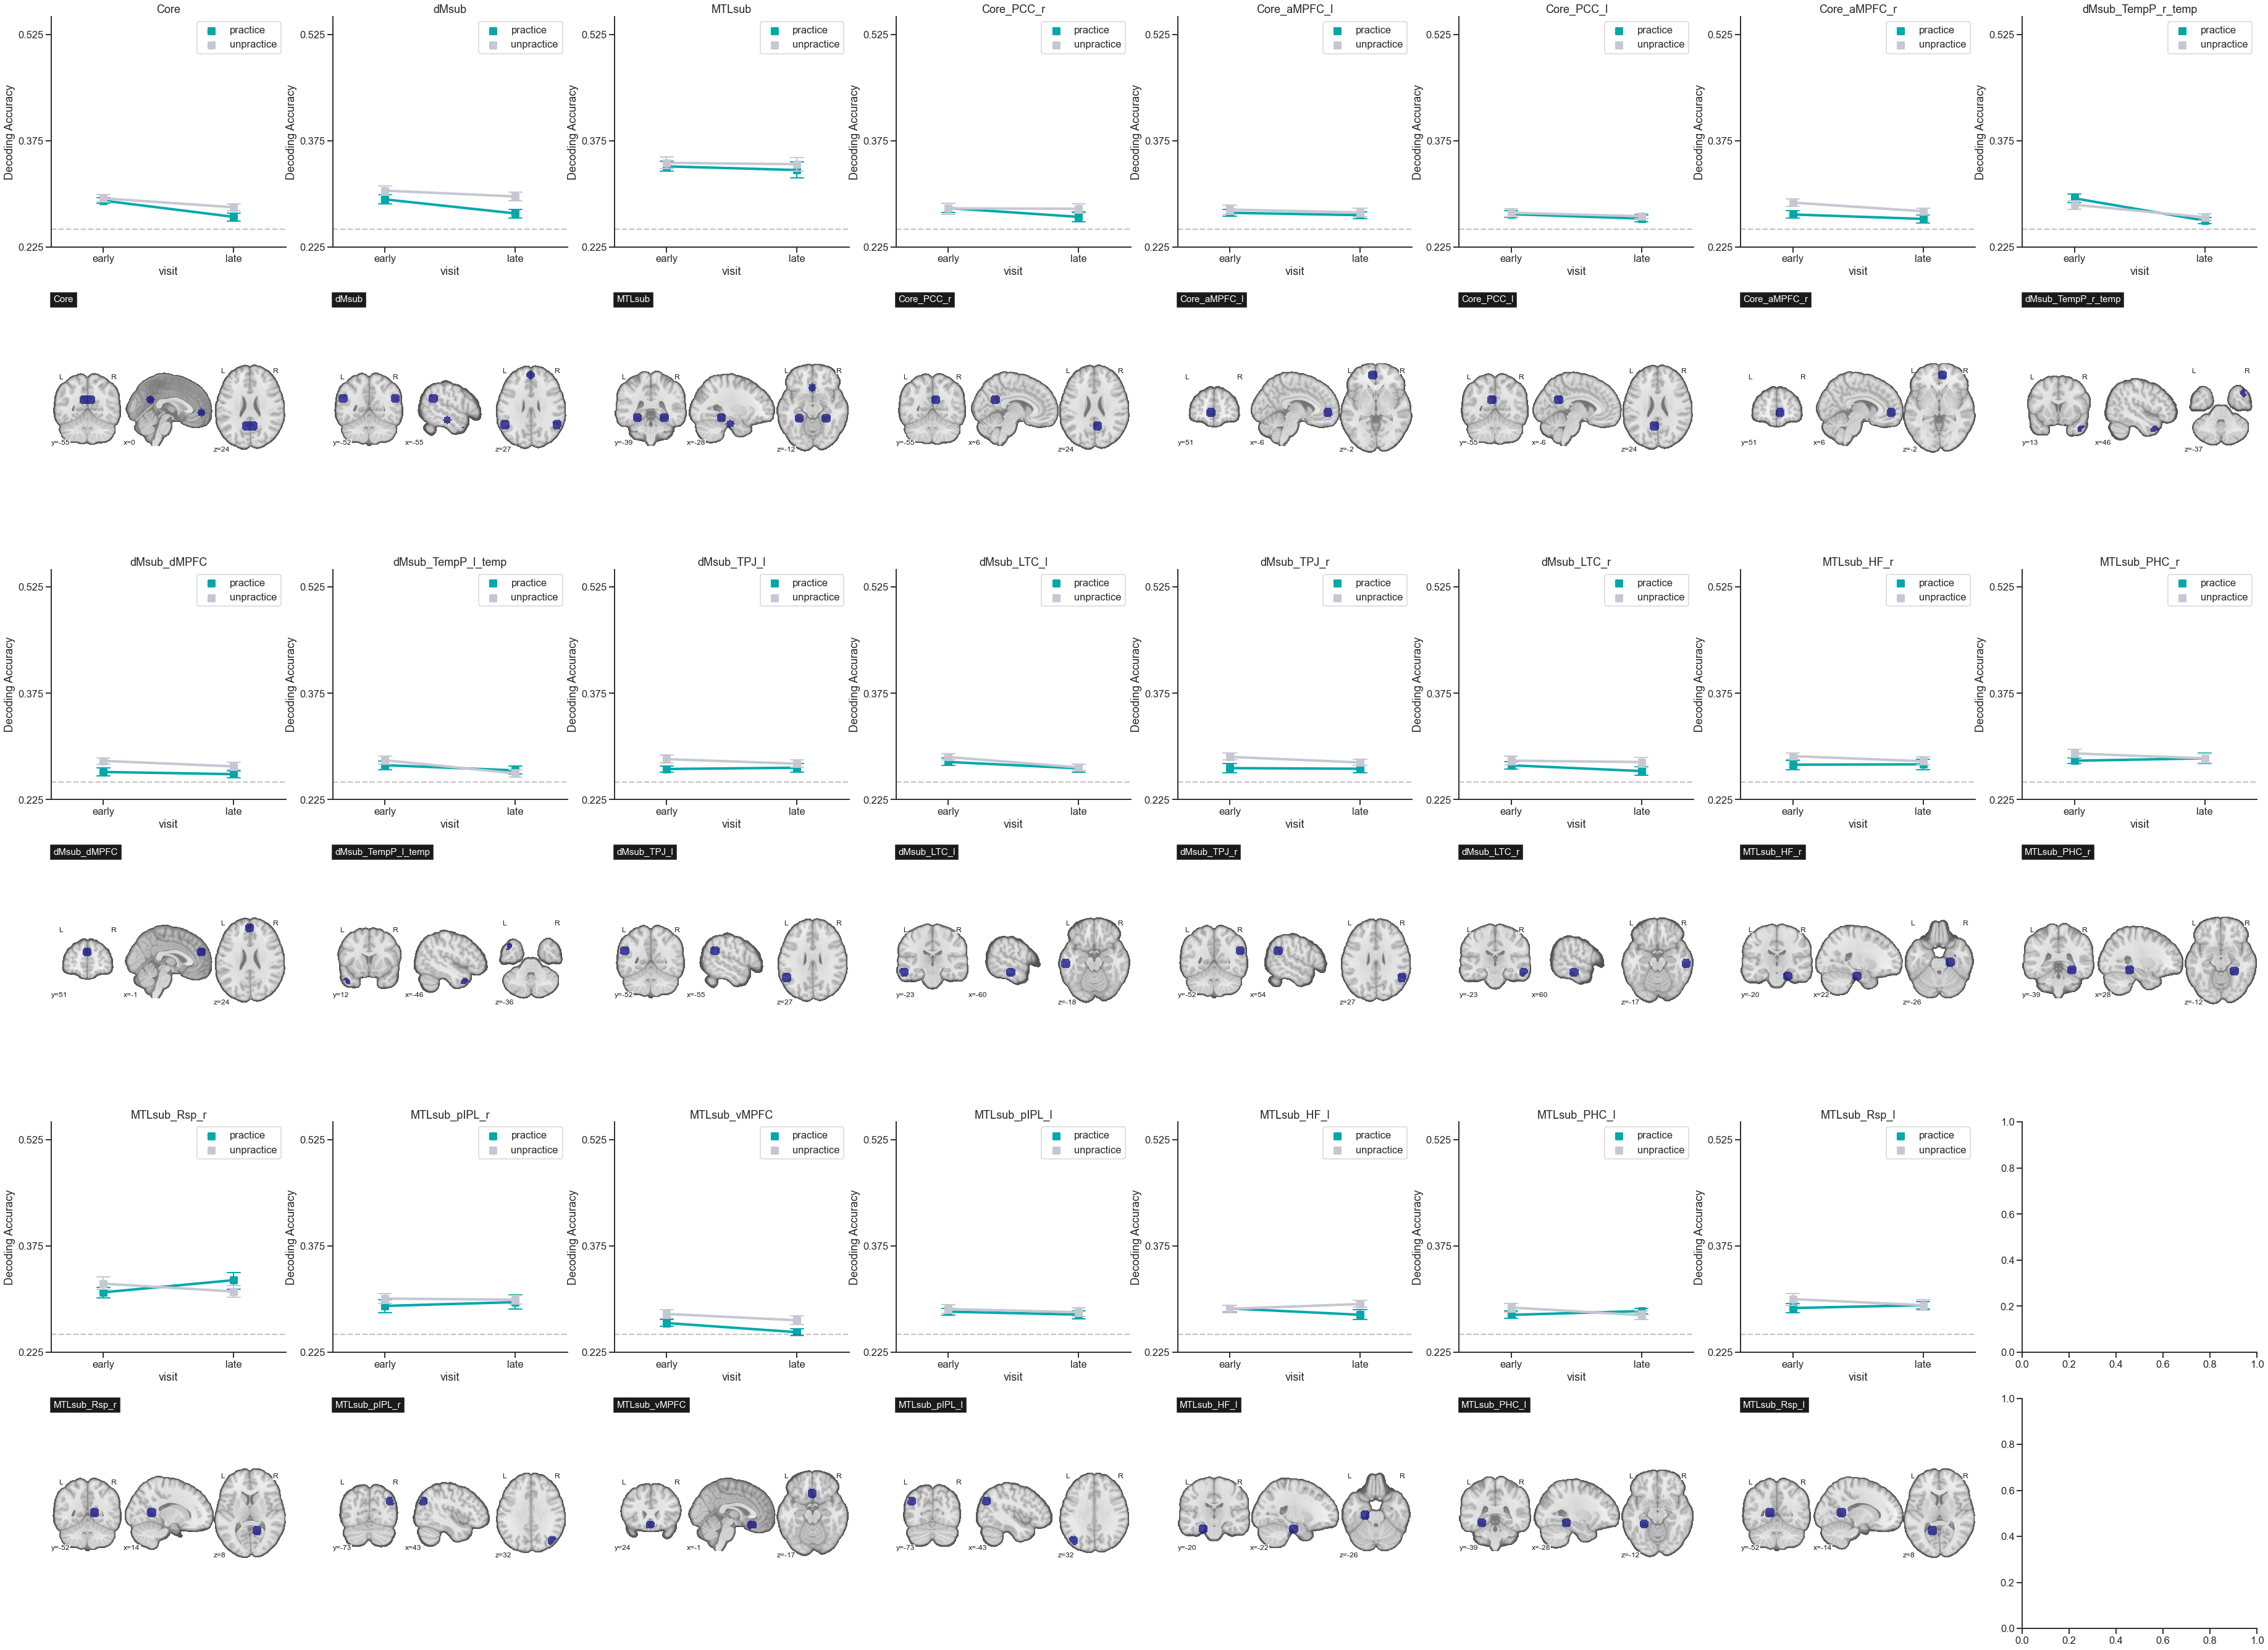

In [9]:
GA.draw_lineplots_with_rois(img_bg=GA.img_bg, n_columns=8)

In [10]:
GA.make_wit_mean_ttest(stage='early_practice', mean=0.25)

,ROI,visit,mapping,tval,pval_uncorrected,reject,pval_corrected
0,Core,early,practice,9.557470,1.824209e-10,True,1.824209e-10
1,dMsub,early,practice,5.784743,2.879420e-06,True,2.879420e-06
2,MTLsub,early,practice,12.597609,2.757169e-13,True,2.757169e-13
3,Core_PCC_r,early,practice,4.341874,1.570437e-04,True,1.570437e-04
4,Core_aMPFC_l,early,practice,4.303960,1.743049e-04,True,1.743049e-04
5,Core_PCC_l,early,practice,4.362740,1.482769e-04,True,1.482769e-04
6,Core_aMPFC_r,early,practice,3.927922,4.863837e-04,True,4.863837e-04
7,dMsub_TempP_r_temp,early,practice,6.640872,2.791293e-07,True,2.791293e-07
8,dMsub_dMPFC,early,practice,2.639808,1.321310e-02,False,1.321310e-02
9,dMsub_TempP_l_temp,early,practice,3.729146,8.302560e-04,True,8.302560e-04


In [11]:
GA.make_wit_mean_ttest(stage='late_practice', mean=0.25)

,ROI,visit,mapping,tval,pval_uncorrected,reject,pval_corrected
0,Core,late,practice,3.259191,2.851428e-03,True,2.851428e-03
1,dMsub,late,practice,3.605832,1.152894e-03,True,1.152894e-03
2,MTLsub,late,practice,7.334242,4.439901e-08,True,4.439901e-08
3,Core_PCC_r,late,practice,2.409334,2.255634e-02,False,2.255634e-02
4,Core_aMPFC_l,late,practice,4.343465,1.563576e-04,True,1.563576e-04
5,Core_PCC_l,late,practice,3.032346,5.071951e-03,False,5.071951e-03
6,Core_aMPFC_r,late,practice,2.814923,8.677852e-03,False,8.677852e-03
7,dMsub_TempP_r_temp,late,practice,2.624293,1.370684e-02,False,1.370684e-02
8,dMsub_dMPFC,late,practice,2.200810,3.586352e-02,False,3.586352e-02
9,dMsub_TempP_l_temp,late,practice,3.014728,5.300587e-03,False,5.300587e-03


In [12]:
GA.make_wit_mean_ttest(stage='early_unpractice', mean=0.25)

,ROI,visit,mapping,tval,pval_uncorrected,reject,pval_corrected
0,Core,early,unpractice,7.740036,1.553432e-08,True,1.553432e-08
1,dMsub,early,unpractice,8.474080,2.449785e-09,True,2.449785e-09
2,MTLsub,early,unpractice,10.933011,8.399663e-12,True,8.399663e-12
3,Core_PCC_r,early,unpractice,3.691938,9.169841e-04,True,9.169841e-04
4,Core_aMPFC_l,early,unpractice,4.261510,1.958627e-04,True,1.958627e-04
5,Core_PCC_l,early,unpractice,3.924405,4.910333e-04,True,4.910333e-04
6,Core_aMPFC_r,early,unpractice,6.662575,2.633160e-07,True,2.633160e-07
7,dMsub_TempP_r_temp,early,unpractice,5.592703,4.894442e-06,True,4.894442e-06
8,dMsub_dMPFC,early,unpractice,6.178657,9.767903e-07,True,9.767903e-07
9,dMsub_TempP_l_temp,early,unpractice,5.463812,6.994452e-06,True,6.994452e-06


In [13]:
GA.make_wit_mean_ttest(stage='late_unpractice', mean=0.25)

,ROI,visit,mapping,tval,pval_uncorrected,reject,pval_corrected
0,Core,late,unpractice,5.967202,1.742827e-06,True,1.742827e-06
1,dMsub,late,unpractice,7.205886,6.214671e-08,True,6.214671e-08
2,MTLsub,late,unpractice,9.895958,8.362789e-11,True,8.362789e-11
3,Core_PCC_r,late,unpractice,4.383198,1.401521e-04,True,1.401521e-04
4,Core_aMPFC_l,late,unpractice,4.046538,3.525206e-04,True,3.525206e-04
5,Core_PCC_l,late,unpractice,5.210050,1.414794e-05,True,1.414794e-05
6,Core_aMPFC_r,late,unpractice,5.957458,1.790087e-06,True,1.790087e-06
7,dMsub_TempP_r_temp,late,unpractice,3.567017,1.277622e-03,True,1.277622e-03
8,dMsub_dMPFC,late,unpractice,3.947171,4.616900e-04,True,4.616900e-04
9,dMsub_TempP_l_temp,late,unpractice,2.222099,3.423734e-02,False,3.423734e-02


In [14]:
GA.do_paired_ttest('early_practice','late_practice')

,ROI,cond_A,cond_B,t-statistic,Two-sided p-value,rejected,pvalue-corrected
0,Core,early_practice,late_practice,3.047261,0.004886,True,0.004886
1,dMsub,early_practice,late_practice,2.139986,0.040898,False,0.040898
2,MTLsub,early_practice,late_practice,0.412475,0.683024,False,0.683024
3,Core_PCC_r,early_practice,late_practice,1.304728,0.202245,False,0.202245
4,Core_aMPFC_l,early_practice,late_practice,0.494325,0.624801,False,0.624801
5,Core_PCC_l,early_practice,late_practice,0.887490,0.382117,False,0.382117
6,Core_aMPFC_r,early_practice,late_practice,0.985765,0.332402,False,0.332402
7,dMsub_TempP_r_temp,early_practice,late_practice,4.239094,0.000208,True,0.000208
8,dMsub_dMPFC,early_practice,late_practice,0.528320,0.601297,False,0.601297
9,dMsub_TempP_l_temp,early_practice,late_practice,0.882722,0.384646,False,0.384646


## Ventral visual stream (TT_Daemon, Brodmann Area)

In [10]:
GA.initialize()

In [3]:
path_list = glob(join(GA.dir_mask, 'TT_Daemon', '*.brik1.BA???.*.nii.gz'))
for path in path_list:
    temp = path.split('/')[-1].replace('.nii.gz', '')
    fname = temp.split('.')[2]
    GA.roi_imgs[fname] = nilearn.image.load_img(path)
GA.roi_imgs

{'BA19L': <nibabel.nifti1.Nifti1Image at 0x7ff170e54850>,
 'BA37R': <nibabel.nifti1.Nifti1Image at 0x7ff151bb70d0>,
 'BA18L': <nibabel.nifti1.Nifti1Image at 0x7ff151bb7490>,
 'BA17R': <nibabel.nifti1.Nifti1Image at 0x7ff151bb0350>,
 'BA19R': <nibabel.nifti1.Nifti1Image at 0x7ff151bb0510>,
 'BA18R': <nibabel.nifti1.Nifti1Image at 0x7ff151bb0790>,
 'BA38L': <nibabel.nifti1.Nifti1Image at 0x7ff151bb0a10>,
 'BA38R': <nibabel.nifti1.Nifti1Image at 0x7ff151bb0c90>,
 'BA20L': <nibabel.nifti1.Nifti1Image at 0x7ff151bbb150>,
 'BA17L': <nibabel.nifti1.Nifti1Image at 0x7ff151bbb050>,
 'BA20R': <nibabel.nifti1.Nifti1Image at 0x7ff151bbb390>,
 'BA37L': <nibabel.nifti1.Nifti1Image at 0x7ff151bbb610>}

## Fan280

In [4]:
GA.initialize()
GA.load_fan()

In [5]:
## DMN regions(global)
module_names = ['Core']

for name in module_names:
    temp = glob(join(GA.dir_dmn, name+'.nii'))
    for path in temp:
        fname = path.split('/')[-1].replace('.nii', '')
        GA.roi_imgs[fname] = nilearn.image.load_img(path)

In [6]:
## yeo_17network == 1
dt = pd.DataFrame()
for nn in [1]:
    dt = dt.append(GA.fan_info[(GA.fan_info.yeo_17network == nn)])
for idx in dt.index:
    nn = dt.loc[idx,'label']
    region = dt.loc[idx,'region']
    GA.roi_imgs[region] = GA.fan_imgs[str(nn)]

In [7]:
## merging visual region

### yeo_17network == 1
GA.roi_imgs['yeo_17network_1'] = GA.merge_fan_rois(Yeo_Network=[1])

### yeo_17network == 2
# GA.roi_imgs['yeo_17network_2'] = merge_fan_rois(Yeo_Network=[2])

### yeo_17network == 1 or 2
# GA.roi_imgs['yeo_17network_1+2'] = merge_fan_rois(Yeo_Network=[1,2])

### subregion_name == 'V5/MT+'
# GA.roi_imgs['V5/MT'] = merge_fan_rois(Sub_Region=['V5/MT+'])

### *Calculation
*run once

In [12]:
for subj in GA.list_subj:
    for stage in GA.list_stage:
        GA.cross_valid(GA.load_beta(subj, stage), GA.lda)

In [13]:
## save the result
GA.save_pkl(data=GA.scores, suffix='Yeo1-DMN')

### Wit dataframe

In [7]:
## compare the results by type
GA.show_pkl_list(GA.dir_script, 'Yeo1-DMN')

,name,identity
0,20210511_Yeo1-DMN.pkl,a


In [51]:
## load scores
GA.scores = GA.load_pkl(fname='20210511_Yeo1-DMN.pkl')

In [52]:
GA.make_wit_score()

,subj,ROI,visit,mapping,accuracy_1,accuracy_2,accuracy_3,mean_accuracy
0,01,Core,early,practice,0.447917,0.333333,0.270833,0.350694
1,01,FuG_L_3_2,early,practice,0.510417,0.500000,0.572917,0.527778
2,01,FuG_R_3_2,early,practice,0.447917,0.500000,0.468750,0.472222
3,01,MVOcC_L_5_1,early,practice,0.666667,0.687500,0.625000,0.659722
4,01,MVOcC_R_5_1,early,practice,0.583333,0.656250,0.583333,0.607639
...,...,...,...,...,...,...,...,...
1915,44,LOcC_R_4_3,late,unpractice,0.718750,0.687500,0.343750,0.583333
1916,44,LOcC_L_4_4,late,unpractice,0.635417,0.645833,0.354167,0.545139
1917,44,LOcC_R_4_4,late,unpractice,0.583333,0.677083,0.333333,0.531250
1918,44,LOcC_L_2_2,late,unpractice,0.531250,0.468750,0.375000,0.458333


Core(n_voxles=760)
FuG_L_3_2(n_voxles=348)
FuG_R_3_2(n_voxles=317)
MVOcC_L_5_1(n_voxles=207)
MVOcC_R_5_1(n_voxles=247)
MVOcC_L_5_3(n_voxles=259)
MVOcC_R_5_3(n_voxles=222)
MVOcC_R_5_4(n_voxles=366)
LOcC_L_4_1(n_voxles=334)
LOcC_R_4_1(n_voxles=336)
LOcC_L_4_3(n_voxles=396)
LOcC_R_4_3(n_voxles=422)
LOcC_L_4_4(n_voxles=460)
LOcC_R_4_4(n_voxles=383)
LOcC_L_2_2(n_voxles=238)
yeo_17network_1(n_voxles=4535)


0

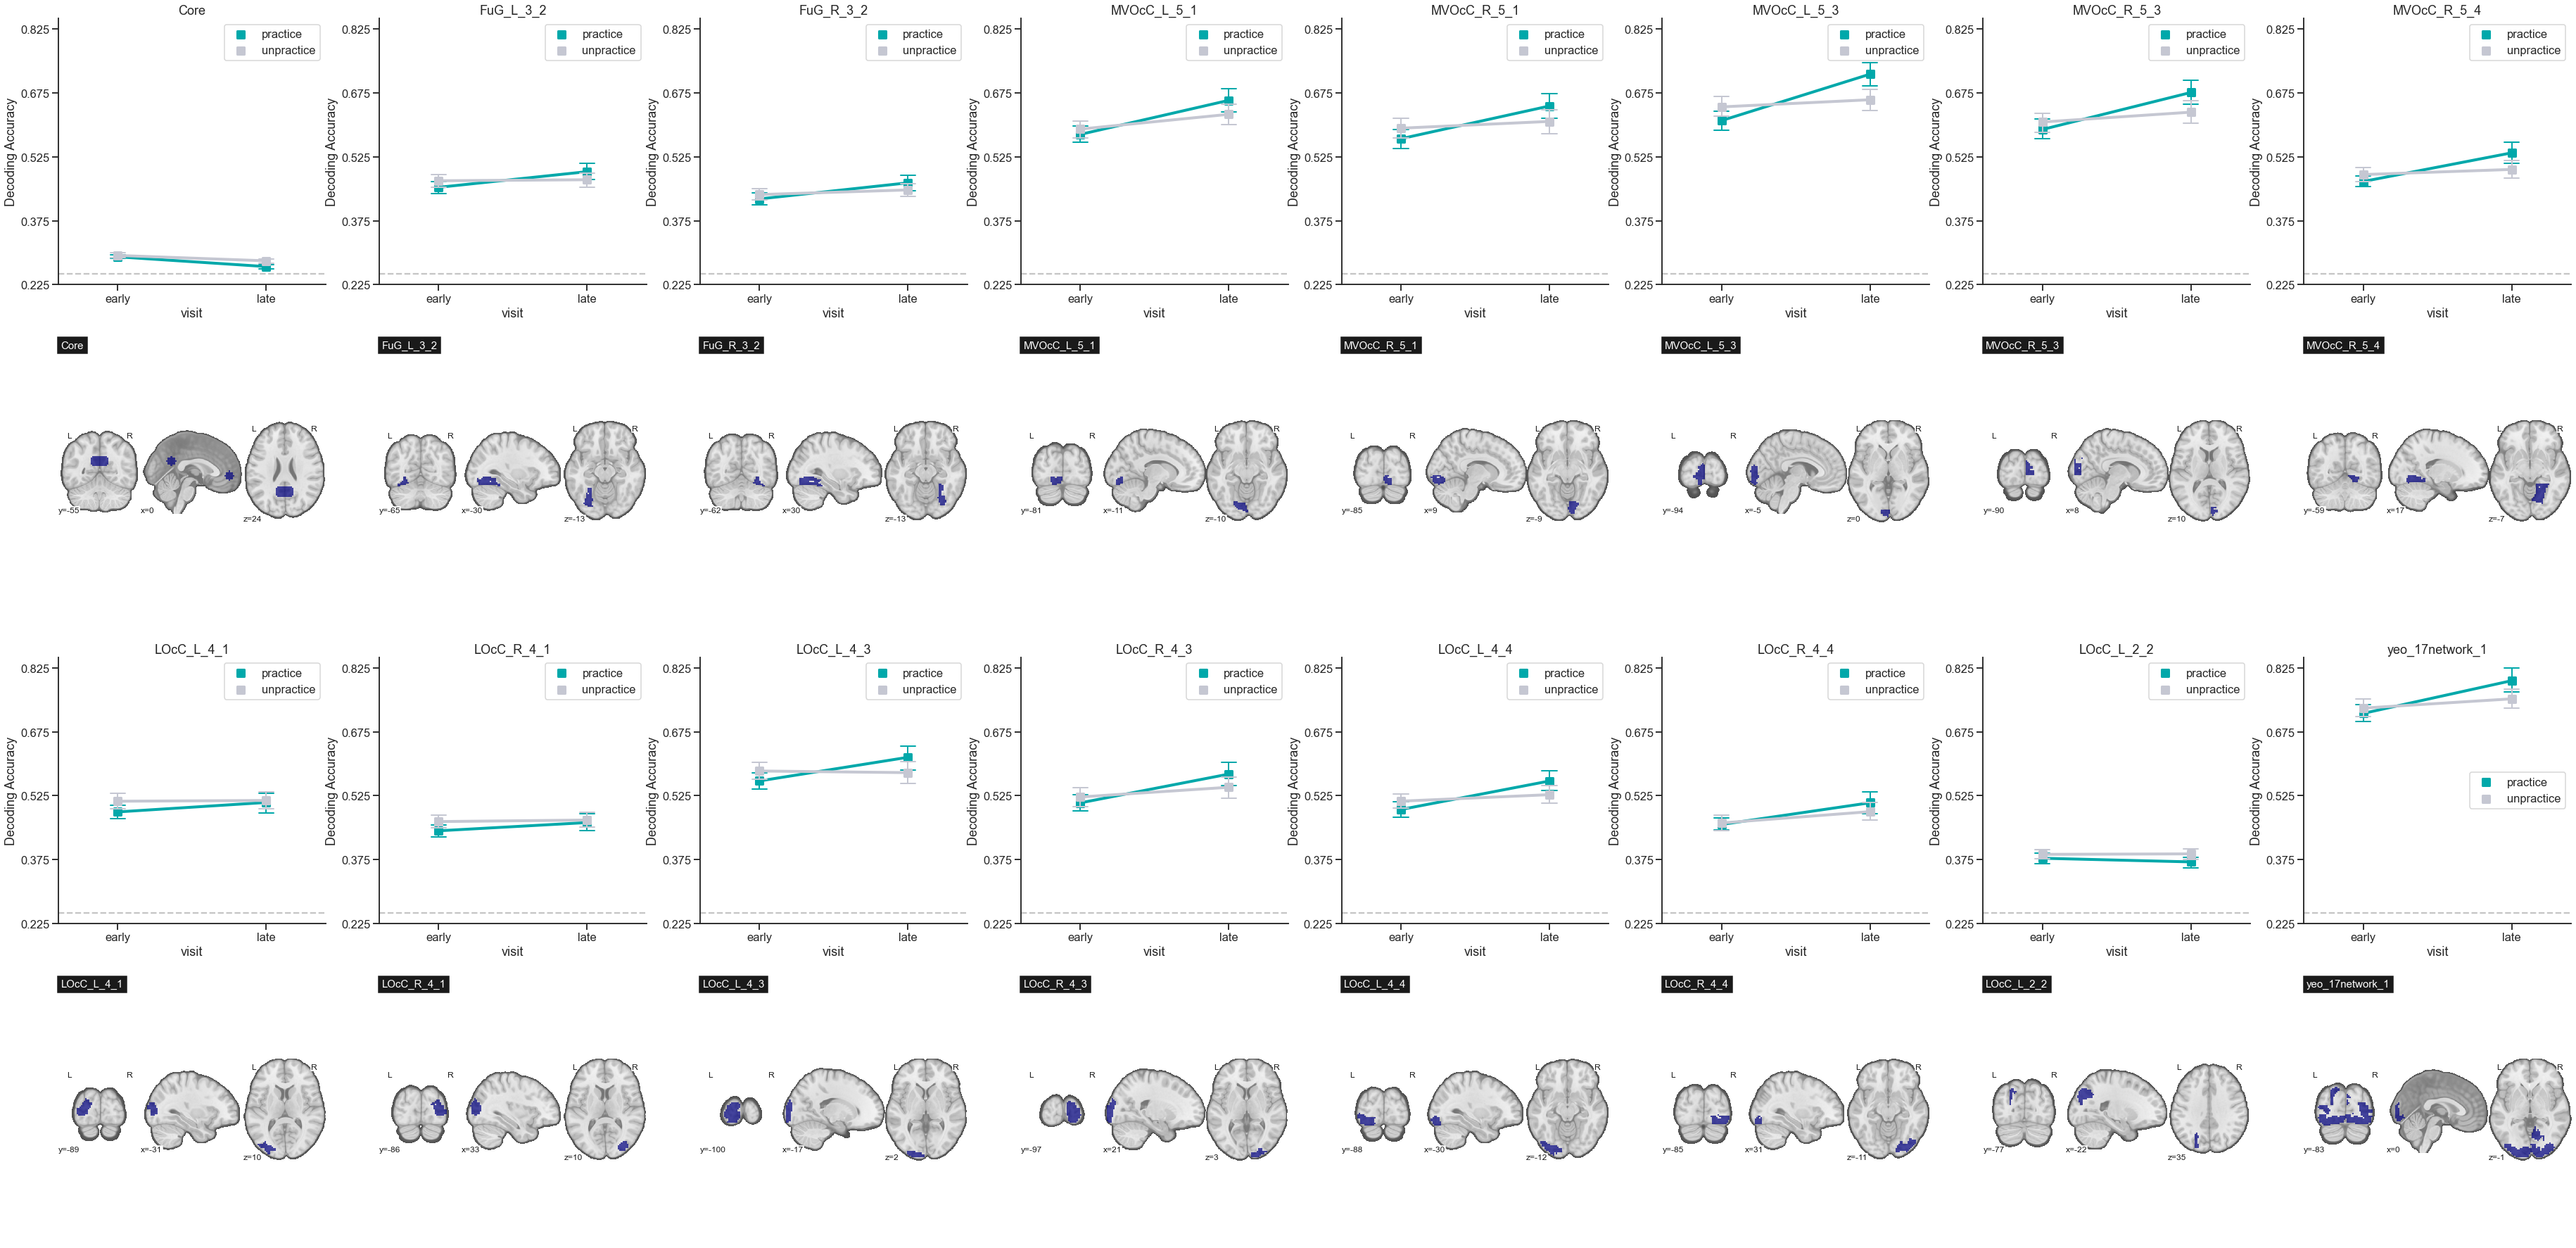

In [53]:
GA.draw_lineplots_with_rois(img_bg=GA.img_bg, n_columns=8, ylim=[.225, .85])

Core(n_voxles=760)
yeo_17network_1(n_voxles=4535)


0

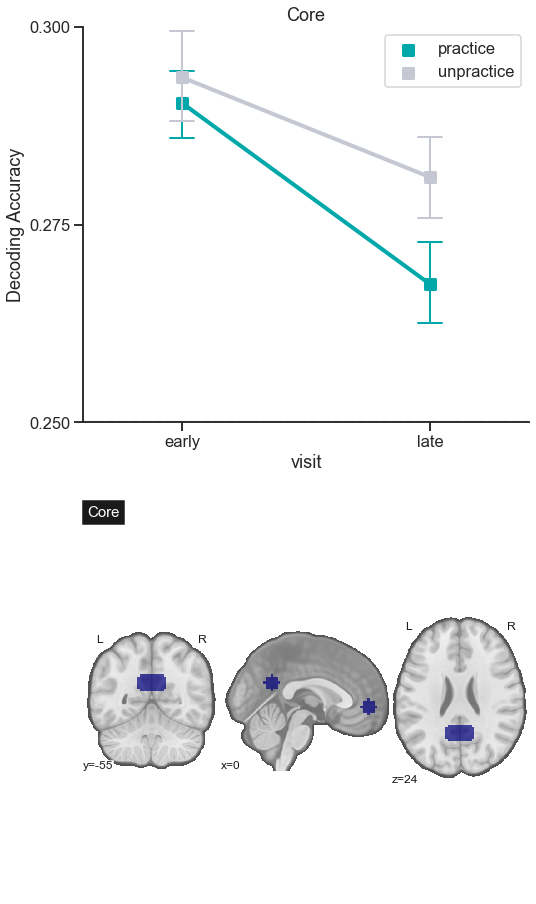

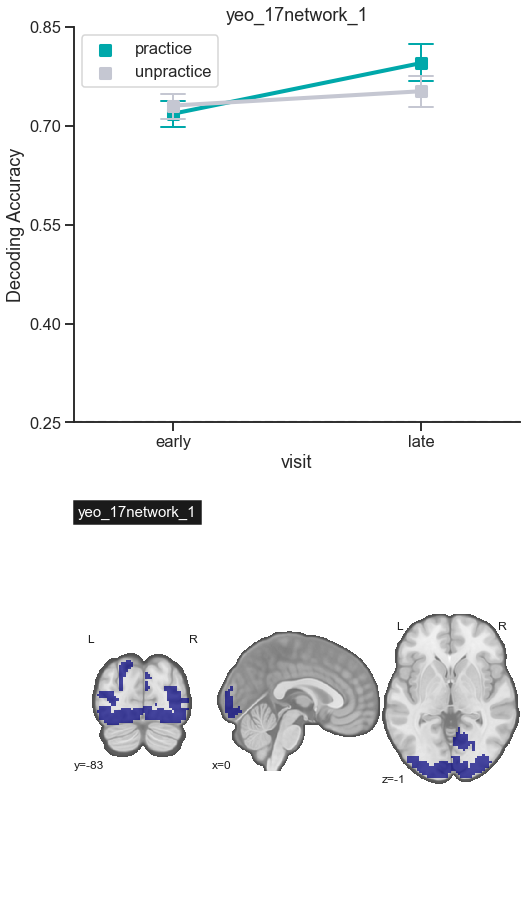

In [54]:
GA.draw_lineplot_with_roi(roi_name='Core', img_bg=GA.img_bg, ylim=[.25,.30], dy=.025)
GA.draw_lineplot_with_roi(roi_name='yeo_17network_1', img_bg=GA.img_bg, ylim=[.25,.85], dy=.15)

## Correlation

### *calculate task-related networks (once)

In [ ]:
GA.calc_wit_func_correl(roiA='Core', roiB='yeo_17network_1')

In [11]:
GA.save_pkl(data=GA.wit_func_correl, suffix='func_correl.Core-Yeo1')

### load the result

In [8]:
GA.show_pkl_list(location=GA.dir_script, word='func_correl.Core-Yeo1')

,name,identity
0,20210517_func_correl.Core-Yeo1.pkl,a


In [9]:
GA.wit_func_correl = GA.load_pkl(fname='20210517_func_correl.Core-Yeo1.pkl')

In [10]:
temp = GA.wit_func_correl.groupby(['subj','visit','mapping']).mean()
del temp['pval']
temp

Pearson_r
subj visit mapping              
01   early practice     0.792798
           unpractice   0.835921
     late  practice     0.647674
           unpractice   0.672230
02   early practice     0.528648
...                          ...
42   late  unpractice   0.398956
44   early practice     0.521578
           unpractice   0.278536
     late  practice     0.315875
           unpractice   0.493692

[120 rows x 1 columns]

In [11]:
del_pearsonr = []
for subj in GA.list_subj:
    del_pearsonr.append(temp.loc[subj,'late','practice']['Pearson_r']-temp.loc[subj,'early','practice']['Pearson_r'])

In [12]:
temp = GA.wit_func_correl.groupby(['roiA','roiB']).mean()

In [36]:
list(temp.index)

[('Core', 'yeo_17network_1')]

In [13]:
for i, (roiA, roiB) in enumerate(list(temp.index)):
    print(i, roiA, roiB)

0 Core yeo_17network_1


<AxesSubplot:title={'center':'r=-0.4794 (p=0.007)'}, xlabel='Core-yeo_17network_1 GB-GA', ylabel='Reward GB-GA'>

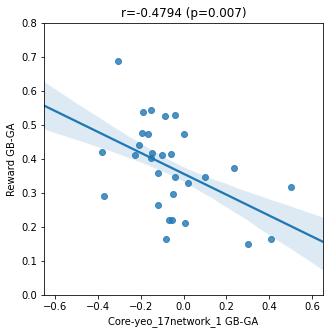

In [14]:
x_label = '%s-%s'%(roiA,roiB)
fig = plt.figure(figsize=(5, 5))
plt.xlim(-0.65, 0.65)
plt.ylim(-0., 0.8)
plt.ylabel('Reward GB-GA')
plt.xlabel('%s GB-GA'%x_label)
plt.title('r=%.4f (p=%.3f)' % (*scipy.stats.pearsonr(x=del_pearsonr, y=GA.del_RewardRate),))
sns.regplot(x=del_pearsonr, y=GA.del_RewardRate, ci=68, truncate=False)

# Searchlight